In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

import pandas as pd
from sklearn import preprocessing

KMEANS

In [2]:
def kmeans(X,K,max_iter=1000):
    """
    Perform k-means on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data
    mean_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    means = X[mean_ind]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a center in 'means'
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j) #d[k] return value of the key k
            
        # calculate new means
        ### your code here
        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_means[k] = X[groups[k]].mean(axis=0)
            else:
                new_means[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(means,new_means):
            #print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    #print("Failed to converge after {} iterations...".format(max_iter))

KMEANS++

In [39]:
def kmeansplus(X,K,max_iter=1000):
    """
    Perform k-means++ on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data, a better way
    #mean_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    #means = X[mean_ind]
    
    mean_ind = []
    mean_ind.append(int(np.random.choice(range(X.shape[0]), 1))) # c1
    #print(X[mean_ind])
    
    for i in range(1,K):
        D2sum = 0
        Pr = []
        for pt in X:
            D2 = np.min(((X[mean_ind]-pt)**2).sum(axis=1))
            D2sum += D2
        for pt in X:
            D2 = np.min(((X[mean_ind]-pt)**2).sum(axis=1))
            Pr.append(D2 / D2sum)
        mean_ind.append(int(np.random.choice(range(X.shape[0]), 1, p=Pr)))
        #print(X[np.array(mean_ind)])
    
    means = X[np.array(mean_ind)]
    #print(means.shape)
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a center in 'means'
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j) #d[k] return value of the key k
            
        # calculate new means
        ### your code here
        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_means[k] = X[groups[k]].mean(axis=0)
            else:
                new_means[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(means,new_means):
            #print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    #print("Failed to converge after {} iterations...".format(max_iter))

KMEDIANS

In [40]:
def kmedians(X,K,max_iter=1000):
    
    # initialize the means as randomly selected points in the data
    median_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    medians = X[median_ind]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a group
        for j in range(X.shape[0]):
            groups[np.argmin((np.abs(medians-X[j,:])).sum(axis=1))].append(j)
            
        # calculate new means
        ### your code here
        new_medians = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_medians[k] = np.median(X[groups[k]], axis=0)
            else:
                new_medians[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(medians,new_medians):
            #print("Converged after {} iterations!".format(i))
            return medians, groups
        else:
            medians = new_medians
            groups = {i:[] for i in range(K)}
    print("Failed to converge after {} iterations...".format(max_iter))

ALG3_means

In [41]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two vectors.
    """
    result = 0.0
    for i in range(x1.shape[0]): #shape[0] is row number
        result += (x1[i] - x2[i]) ** 2
    return np.sqrt(result)

def ALG3_means(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = np.sqrt(float(dim)) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if euclid_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmeans(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        means, group = kmeans(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, means))
   
    return Y, revisedY, cluster_pts

ALG3_meansplus

In [42]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two vectors.
    """
    result = 0.0
    for i in range(x1.shape[0]): #shape[0] is row number
        result += (x1[i] - x2[i]) ** 2
    return np.sqrt(result)

def ALG3_meansplus(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = np.sqrt(float(dim)) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if euclid_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmeansplus(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        means, group = kmeansplus(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, means))
   
    return Y, revisedY, cluster_pts

ALG3_medians (distance is Manhattan distance)

In [43]:
def M_dist(x1, x2):
    """
    Manhattan distance between two vectors.
    """
    result = np.linalg.norm(x1 - x2, ord=1)
    return result

def ALG3_medians(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = float(dim) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if M_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmedians(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        medians, group = kmedians(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, medians))
   
    return Y, revisedY, cluster_pts

Fairness score computation

alpha

In [44]:
# show the bad coalition
def fairness_score_alpha(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension alpha defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_alpha : float
        There are at most max_alpha * (n/K) agents who want to together deviate to another common location(center)
        Algorithm which computes "centers" doesn't care these <max_alpha * (n/K)> agents adequately
    """
    
    n, dim = X.shape
    K = centers.shape[0]
    max_alpha = 0
    
    # grid search for possible deviating center(location)
    for p in range(pow(n_grid, dim)):
        
        # transform p to a deviating center
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)# d(i,Y)
            
            ratio_list.append(min_dist_to_centers / euclid_dist(loc, pt))
            # For current loop-fixed deviating center loc, X has a ratio_list whose element is d(i,Y)/d(i,y') (y' is unchanged in ratio_list)
        
        index = np.argsort(ratio_list)  
        
        if max(ratio_list) >= 1.0: # There really exists some pt(agent) in X who prefers to deviate to current loop-fixed location(center)
            
            A = 0 # \sum{d(i, Y)}
            B = 0 # \sum{d(i, y')}

            alpha_coalition = []
            for i in range(n):
                pt = X[index[-1-i]]
                
                alpha_coalition.append(pt)
                
                to_center_dist = []
                for c in centers:
                    to_center_dist.append(euclid_dist(c, pt))
                min_dist_to_centers = min(to_center_dist)
                
                A += min_dist_to_centers
                B += euclid_dist(loc, pt) # here loc = y'
                
                # For a real deviating center, when i iterates not much, A/B is large since y' is highly close to pts in X[index[-1-i]]
                if A/B <= 1.0: 
                    # now find a group of agents with size i+1(i starts from 0, i+1 is true number of points) won't divert to loc (i.e., sum_d(i,Y) <= sum_d(i,loc))
                    # i agents will divert to loc together, i+1 agents won't, then (i+1)/(n/K) is this y'(loc)'s alpha
                    if max_alpha < (i+1) * K/ n:
                        #always update max_alpha with current largest alpha
                        max_alpha = (i+1) * K/ n
                        max_alpha_coalition = np.array(alpha_coalition)
                        max_alpha_deviating_center = loc
                        break
                    break
                    
    # max_alpha_coalition: ndarray of points in X with max_alpha
    return max_alpha, max_alpha_coalition, max_alpha_deviating_center

beta

In [45]:
def fairness_score_beta(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension beta defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_beta : float
        All kinds of ceil(n/K) agents have total distance to their closest centers smaller than that to the center they most want to deviate
    """
    
    n, dim = X.shape
    max_beta = 0
    K = centers.shape[0]
    
    # grid search for feasible cluster center location 'loc'
    for p in range(pow(n_grid, dim)):
        
        # transform p to practical possible deviating `location
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist) 
            #for this pt, the distance between it and the center closest to it is min_dist_to_centers
            #in paper, it is d(pt,centers)
            
            ratio_list.append(min_dist_to_centers / euclid_dist(loc, pt))
        
        index = np.argsort(ratio_list)
        #index is ndarray whose elements are indexes of ratio_list and the indexes' corresponding elements in ratio_list are in increasing order
        
        A = 0 # \sum{d(i, Y)}
        B = 0 # \sum{d(i, y')}
        
        beta_coalition = []
        for i in range(math.ceil(n/K)):
            pt = X[index[-1-i]]
            # find ceil(n/K) points whose ratio in ratios list are first ceil(n/K) large ones
            # these points most possibly in X divert to loc in this p loop 
            
            beta_coalition.append(pt)
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)
            #print(min_dist_to_centers / euclid_dist(loc, pt))
            
            A += min_dist_to_centers
            B += euclid_dist(loc, pt)
        
        if A/B > max_beta:
            max_beta = A/B
            max_beta_coalition = np.array(beta_coalition)
            max_beta_deviating_center = loc

    return max_beta, max_beta_coalition, max_beta_deviating_center

alpha for M distance

In [46]:
# show the bad coalition
def fairness_score_alpha_M(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension alpha defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_alpha : float
        There are at most max_alpha * (n/K) agents who want to together deviate to another common location(center)
        Algorithm which computes "centers" doesn't care these <max_alpha * (n/K)> agents adequately
    """
    
    n, dim = X.shape
    K = centers.shape[0]
    max_alpha = 0
    
    # grid search for possible deviating center(location)
    for p in range(pow(n_grid, dim)):
        
        # transform p to a deviating center
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)# d(i,Y)
            
            ratio_list.append(min_dist_to_centers / M_dist(loc, pt))
            # For current loop-fixed deviating center loc, X has a ratio_list whose element is d(i,Y)/d(i,y') (y' is unchanged in ratio_list)
        
        index = np.argsort(ratio_list)  
        
        if max(ratio_list) >= 1.0: # There really exists some pt(agent) in X who prefers to deviate to current loop-fixed location(center)
            
            A = 0 # \sum{d(i, Y)}
            B = 0 # \sum{d(i, y')}

            alpha_coalition = []
            for i in range(n):
                pt = X[index[-1-i]]
                
                alpha_coalition.append(pt)
                
                to_center_dist = []
                for c in centers:
                    to_center_dist.append(M_dist(c, pt))
                min_dist_to_centers = min(to_center_dist)
                
                A += min_dist_to_centers
                B += M_dist(loc, pt) # here loc = y'
                
                # For a real deviating center, when i iterates not much, A/B is large since y' is highly close to pts in X[index[-1-i]]
                if A/B <= 1.0: 
                    # now find a group of agents with size i+1(i starts from 0, i+1 is true number of points) won't divert to loc (i.e., sum_d(i,Y) <= sum_d(i,loc))
                    # i agents will divert to loc together, i+1 agents won't, then (i+1)/(n/K) is this y'(loc)'s alpha
                    if max_alpha < (i+1) * K/ n:
                        #always update max_alpha with current largest alpha
                        max_alpha = (i+1) * K/ n
                        max_alpha_coalition = np.array(alpha_coalition)
                        max_alpha_deviating_center = loc
                        break
                    break
                    
    # max_alpha_coalition: ndarray of points in X with max_alpha
    return max_alpha, max_alpha_coalition, max_alpha_deviating_center

beta for M distance

In [47]:
def fairness_score_beta_M(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension beta defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_beta : float
        All kinds of ceil(n/K) agents have total distance to their closest centers smaller than that to the center they most want to deviate
    """
    
    n, dim = X.shape
    max_beta = 0
    K = centers.shape[0]
    
    # grid search for feasible cluster center location 'loc'
    for p in range(pow(n_grid, dim)):
        
        # transform p to practical possible deviating `location
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist) 
            #for this pt, the distance between it and the center closest to it is min_dist_to_centers
            #in paper, it is d(pt,centers)
            
            ratio_list.append(min_dist_to_centers / M_dist(loc, pt))
        
        index = np.argsort(ratio_list)
        #index is ndarray whose elements are indexes of ratio_list and the indexes' corresponding elements in ratio_list are in increasing order
        
        A = 0 # \sum{d(i, Y)}
        B = 0 # \sum{d(i, y')}
        
        beta_coalition = []
        for i in range(math.ceil(n/K)):
            pt = X[index[-1-i]]
            # find ceil(n/K) points whose ratio in ratios list are first ceil(n/K) large ones
            # these points most possibly in X divert to loc in this p loop 
            
            beta_coalition.append(pt)
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)
            #print(min_dist_to_centers / euclid_dist(loc, pt))
            
            A += min_dist_to_centers
            B += M_dist(loc, pt)
        
        if A/B > max_beta:
            max_beta = A/B
            max_beta_coalition = np.array(beta_coalition)
            max_beta_deviating_center = loc

    return max_beta, max_beta_coalition, max_beta_deviating_center

totaldist(objective) computation

In [48]:
def totaldist(X, centers, ismeans):
    '''
    Compute total distance for kmeans or kmedians
    
    X: dataset
    centers: ndarray of shape (K, dim)
    ismeans: True when centers are related to kmeans; False when median
    
    '''

    totaldist = 0
    
    if ismeans:
        for pt in X:
            totaldist += np.min(((centers-pt)**2).sum(axis=1))
    else:
        for pt in X:
            totaldist += np.min(np.abs(centers-pt).sum(axis=1))
    
    return totaldist

Visualization

ALG3_augmented_nofix(Y, revisedY, cluster_pts)

In [49]:
def ALG3_augmented_nofix(Y, revisedY, cluster_pts):
    
    #Y, revisedY, cluster_pts = ALG3(gaussian1, 10, 20, 1/200)

    color = ['c','y','palegreen','plum','tan',
             'yellow','paleturquoise','pink','cornflowerblue','mistyrose',
             'olive','salmon','lightskyblue','darkgrey','lime',
            'lightcoral','tomato','chocolate','olivedrab','cadetblue']

    for i in range(len(cluster_pts)):
        plt.scatter(cluster_pts[i][:,0], cluster_pts[i][:,1], s = 3, c=color[i])

    plt.scatter(Y[:, 0], Y[:, 1], s=80, marker='*', c='r')# s is size
    plt.scatter(revisedY[:, 0], revisedY[:, 1], s=100, marker='x', c='b')# s is size

max_alpha_coalition(max_alpha_coalition, max_alpha_deviating_center):

In [50]:
def max_alpha_coalition(max_alpha_coalition, max_alpha_deviating_center):
    plt.scatter(max_alpha_coalition[:, 0], max_alpha_coalition[:, 1], s=20, marker='*')
    plt.scatter(max_alpha_deviating_center[0], max_alpha_deviating_center[1], s=100, marker='*', c='r')

max_beta_coalition(max_beta_coalition, max_beta_deviating_center)

In [51]:
def max_beta_coalition(max_beta_coalition, max_beta_deviating_center):
    plt.scatter(max_beta_coalition[:, 0], max_beta_coalition[:, 1], s=20, marker='*')
    plt.scatter(max_beta_deviating_center[0], max_beta_deviating_center[1], s=100, marker='*', c='r')

view_meansormedians(X, centers, groups) #different from ALG3_? is because the specialty of their return

In [52]:
def view_meansormedians(X, centers, groups):
    # find each cluster in kmeans_fix_several_centers
    cluster = []
    for value in groups.values():
        each_cluster = np.zeros(2)
        for i in value:
            each_cluster = np.vstack((each_cluster, X[i]))
        each_cluster = np.delete(each_cluster, 0, axis=0)
        cluster.append(each_cluster)

    #use different colors to draw each cluster that k-means derives
    color = ['c','y','palegreen','plum','tan',
             'yellow','paleturquoise','pink','cornflowerblue','mistyrose',
             'olive','salmon','lightskyblue','darkgrey','lime',
            'lightcoral','tomato','chocolate','olivedrab','cadetblue']# only afford less than 20 clusters!!!
    for i in range(len(cluster)):
        plt.scatter(cluster[i][:,0], cluster[i][:,1], s = 3, c=color[i])
    plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='x', c='b')# s is size

IMPORT dataset

[[0.68391154 0.54350367]
 [0.68570112 0.55113605]
 [0.61280989 0.57024472]
 ...
 [0.66958421 0.88094298]
 [0.61543589 0.87815383]
 [0.70506817 0.86060774]]


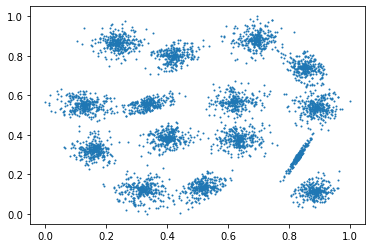

In [35]:
gauss15 = pd.read_csv('/Users/lijunli/Desktop/ex/Fair clustering/dataset/15gauss.csv', header=None)

gauss15 = np.array(gauss15)
#gauss15.shape

min_max_scaler = preprocessing.MinMaxScaler()
gaussian_data = min_max_scaler.fit_transform(gauss15)
print(gaussian_data)
plt.scatter(gaussian_data[:,0], gaussian_data[:,1],s=1)

medians part

In [ ]:
for K in range(8,18):
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)


    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)

# carelessly run it in markdown mode and lose its output data, but previously saved output data in gaussS1score.csv  

In [56]:
for i in range(3):
    K=8
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)

    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)

for i in range(3):
    K=11
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)

    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
    
    
    
    

1.6912 1.9065081431329336 666.6880161978191
1.3904 1.208586415772149 620.2062962243755
1.2 1.128971589313643 601.2816092110155
1.8688 2.0186503292054634 649.7714825493732
1.2752 1.18803612319678 601.9181764581158
1.8688 2.0186503292054634 649.7714825493732
2.3474 2.8206039753136682 647.0531966160397
1.4982 1.5388253550532727 434.18387490731885
1.7534 1.8266100065777506 493.5039897531696
1.4982 1.5388253550532727 434.18387490731885
1.3574 1.3504809466838827 429.8788522436425
1.6742 1.9955218200471214 468.6059835713172


In [57]:
for i in range(3):
    K=8
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)

    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)

1.9808 2.2493803261183984 677.1822881898745
1.3904 1.208586415772149 620.2062962243755
1.9872 1.7786032780894383 620.2229017040519
1.3904 1.2082081801672004 657.8311343787533
1.9952 1.788055428053887 621.247197562359
1.8688 2.0186503292054634 649.7714825493732


RUN Algorithms

Accuracy=20

In [41]:
means, groups_means = kmeans(gaussian_data, 5)
max_alpha_means, max_alpha_coalition_means, max_alpha_deviating_center_means = fairness_score_alpha(gaussian_data, means, 20)
max_beta_means, max_beta_coalition_means, max_beta_deviating_center_means = fairness_score_beta(gaussian_data, means, 20)
print(max_alpha_means, max_beta_means)

1.511 1.2545959505578204


In [43]:
totaldist_means = totaldist(gaussian_data, means, True)
print(totaldist_means)

137.86325440467814


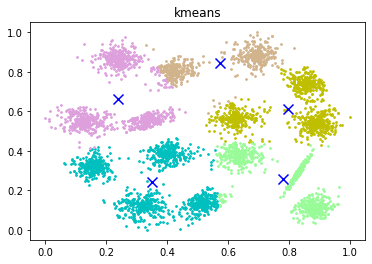

In [42]:
view_meansormedians(gaussian_data, means, groups_means)
plt.title("kmeans")
plt.show()

In [44]:
medians, groups_medians = kmedians(gaussian_data, 5)
max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
totaldist_medians = totaldist(gaussian_data, medians, False)
print(max_alpha_medians, max_beta_medians, totaldist_medians)

1.576 1.5214875396891503 969.4972633370479


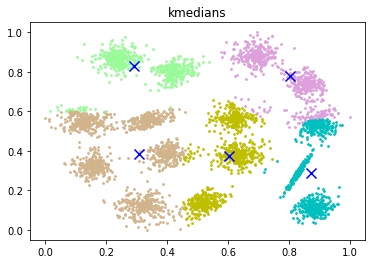

In [45]:
view_meansormedians(gaussian_data, medians, groups_medians)
plt.title("kmedians")
plt.show()

In [46]:
Y_means_20, revisedY_means_20, cluster_pts_means_20 = ALG3_means(gaussian_data, 5, 20, 1/200)
max_alpha_A3means20, max_alpha_coalition_A3means20, max_alpha_deviating_center_A3means20 = fairness_score_alpha(gaussian_data, revisedY_means_20, 20)
max_beta_A3means20, max_beta_coalition_A3means20, max_beta_deviating_center_A3means20 = fairness_score_beta(gaussian_data, revisedY_means_20, 20)
totaldist_A3means20 = totaldist(gaussian_data, revisedY_means_20, True)
print(max_alpha_A3means20, max_beta_A3means20, totaldist_A3means20)

1.459 1.2791148167332045 140.74697969199605


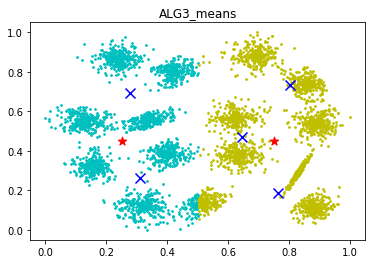

In [47]:
ALG3_augmented_nofix(Y_means_20, revisedY_means_20, cluster_pts_means_20)
plt.title("ALG3_means")
plt.show()

In [48]:
Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, 5, 20, 1/200)
max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)

1.351 1.519642716854703 983.9553991277887


Text(0.5, 1.0, 'ALG3_medians K=5')

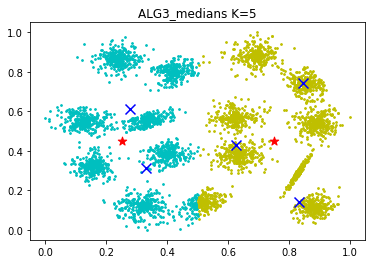

In [56]:
ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
plt.title("ALG3_medians K={}".format(5))
#plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmedians K={}.png".format(5))
# when saving, do not show!!!

In [57]:
for K in range(6,8):
    means, groups_means = kmeans(gaussian_data, K)
    max_alpha_means, max_alpha_coalition_means, max_alpha_deviating_center_means = fairness_score_alpha(gaussian_data, means, 20)
    max_beta_means, max_beta_coalition_means, max_beta_deviating_center_means = fairness_score_beta(gaussian_data, means, 20)
    totaldist_means = totaldist(gaussian_data, means, True)
    print(max_alpha_means, max_beta_means, totaldist_means)
    view_meansormedians(gaussian_data, means, groups_means)
    plt.title("kmeans K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeans K={}".format(K))
    plt.clf()# renew to prevent overlap
    
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)
    view_meansormedians(gaussian_data, medians, groups_medians)
    plt.title("kmedians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmedians K={}".format(K))
    plt.clf()

    Y_means_20, revisedY_means_20, cluster_pts_means_20 = ALG3_means(gaussian_data, K, 20, 1/200)
    max_alpha_A3means20, max_alpha_coalition_A3means20, max_alpha_deviating_center_A3means20 = fairness_score_alpha(gaussian_data, revisedY_means_20, 20)
    max_beta_A3means20, max_beta_coalition_A3means20, max_beta_deviating_center_A3means20 = fairness_score_beta(gaussian_data, revisedY_means_20, 20)
    totaldist_A3means20 = totaldist(gaussian_data, revisedY_means_20, True)
    print(max_alpha_A3means20, max_beta_A3means20, totaldist_A3means20)
    ALG3_augmented_nofix(Y_means_20, revisedY_means_20, cluster_pts_means_20)
    plt.title("ALG3_means K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_means K={}".format(K))
    plt.clf()
    
    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
    ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
    plt.title("ALG3_medians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_medians K={}".format(K))
    plt.clf()

1.5972 1.275793244096067 105.28360910123087
2.0148 1.8421713228556889 792.0080086543154
1.476 1.4698943788848542 144.82663002065604
2.0604 1.8601037055773133 824.6952222024498
1.6366 1.464349424029619 74.10346125801196
1.7094 1.590483407176801 721.8823520156612
1.876 1.6380770969975593 93.67756328736172
1.9124 1.9644202735452625 717.3131244965288


<Figure size 432x288 with 0 Axes>

1.4672 1.4540555947413436 60.89220963963496
2.2624 2.843021062849913 766.8356968047351
1.1232 1.085971829271258 64.03265134312261
1.8688 2.0186503292054634 649.7714825493732
2.259 1.8499528110199954 60.28371457372329
2.2032 2.030838573853267 566.2810051470797
1.2132 1.1611730794119024 50.573210393964004
1.2708 1.2188048078333362 549.8735495006363
1.35 1.3242375241038982 50.86766297272848
1.594 1.526980296172641 497.1687860973329
1.296 1.222226172232877 40.09445392195964
1.398 1.3458108240428694 502.03869954637713
1.4234 1.3702485391703363 34.31424610342339


IndexError: list index out of range

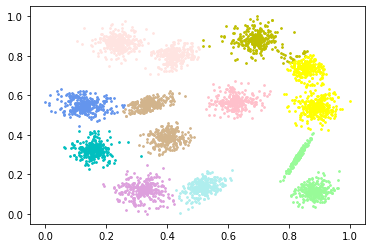

In [58]:
for K in range(8,16):
    means, groups_means = kmeans(gaussian_data, K)
    max_alpha_means, max_alpha_coalition_means, max_alpha_deviating_center_means = fairness_score_alpha(gaussian_data, means, 20)
    max_beta_means, max_beta_coalition_means, max_beta_deviating_center_means = fairness_score_beta(gaussian_data, means, 20)
    totaldist_means = totaldist(gaussian_data, means, True)
    print(max_alpha_means, max_beta_means, totaldist_means)
    view_meansormedians(gaussian_data, means, groups_means)
    plt.title("kmeans K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeans K={}".format(K))
    plt.clf()# renew to prevent overlap
    
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)
    view_meansormedians(gaussian_data, medians, groups_medians)
    plt.title("kmedians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmedians K={}".format(K))
    plt.clf()

    Y_means_20, revisedY_means_20, cluster_pts_means_20 = ALG3_means(gaussian_data, K, 20, 1/200)
    max_alpha_A3means20, max_alpha_coalition_A3means20, max_alpha_deviating_center_A3means20 = fairness_score_alpha(gaussian_data, revisedY_means_20, 20)
    max_beta_A3means20, max_beta_coalition_A3means20, max_beta_deviating_center_A3means20 = fairness_score_beta(gaussian_data, revisedY_means_20, 20)
    totaldist_A3means20 = totaldist(gaussian_data, revisedY_means_20, True)
    print(max_alpha_A3means20, max_beta_A3means20, totaldist_A3means20)
    ALG3_augmented_nofix(Y_means_20, revisedY_means_20, cluster_pts_means_20)
    plt.title("ALG3_means K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_means K={}".format(K))
    plt.clf()
    
    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
    ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
    plt.title("ALG3_medians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_medians K={}".format(K))
    plt.clf()

check when k=11, why list index out of range

In [63]:
# means, groups_means = kmeans(gaussian_data, 11)
# view_meansormedians(gaussian_data, means, groups_means)
# plt.title("kmeans K={}".format(11))

In [64]:
for K in range(12,16):
    means, groups_means = kmeans(gaussian_data, K)
    max_alpha_means, max_alpha_coalition_means, max_alpha_deviating_center_means = fairness_score_alpha(gaussian_data, means, 20)
    max_beta_means, max_beta_coalition_means, max_beta_deviating_center_means = fairness_score_beta(gaussian_data, means, 20)
    totaldist_means = totaldist(gaussian_data, means, True)
    print(max_alpha_means, max_beta_means, totaldist_means)
    view_meansormedians(gaussian_data, means, groups_means)
    plt.title("kmeans K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeans K={}".format(K))
    plt.clf()# renew to prevent overlap
    
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)
    view_meansormedians(gaussian_data, medians, groups_medians)
    plt.title("kmedians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmedians K={}".format(K))
    plt.clf()

    Y_means_20, revisedY_means_20, cluster_pts_means_20 = ALG3_means(gaussian_data, K, 20, 1/200)
    max_alpha_A3means20, max_alpha_coalition_A3means20, max_alpha_deviating_center_A3means20 = fairness_score_alpha(gaussian_data, revisedY_means_20, 20)
    max_beta_A3means20, max_beta_coalition_A3means20, max_beta_deviating_center_A3means20 = fairness_score_beta(gaussian_data, revisedY_means_20, 20)
    totaldist_A3means20 = totaldist(gaussian_data, revisedY_means_20, True)
    print(max_alpha_A3means20, max_beta_A3means20, totaldist_A3means20)
    ALG3_augmented_nofix(Y_means_20, revisedY_means_20, cluster_pts_means_20)
    plt.title("ALG3_means K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_means K={}".format(K))
    plt.clf()
    
    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
    ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
    plt.title("ALG3_medians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_medians K={}".format(K))
    plt.clf()

1.5456 1.497167549368483 34.67491071379383
1.6968 1.9280358980603791 441.00440570964355
1.5408 1.4927435673243787 29.02153125617207
1.4904 1.5477124807725995 429.0827169567119
1.6718 1.8434394860435215 27.752097580210947
1.651 2.1932342696144307 375.26391714126413
1.6562 1.6810664768517345 23.261249343766984
1.5704 1.9801096242071887 326.22467603821343
1.8172 1.862265319713845 21.687828207076098
1.82 2.825562256260814 343.28875610976877
1.6128 1.6326282634461293 15.99152678807312
1.5204 1.777643268893813 274.44654980511547
1.764 2.0292199755177514 15.76910958832104
1.848 2.8087535913794226 330.24835915830556
1.488 2.6562424729503267 15.30092131376436
0.804 0.8870216963465606 231.6390689422973


<Figure size 432x288 with 0 Axes>

In [65]:
K=11
# means, groups_means = kmeans(gaussian_data, K)
# max_alpha_means, max_alpha_coalition_means, max_alpha_deviating_center_means = fairness_score_alpha(gaussian_data, means, 20)
# max_beta_means, max_beta_coalition_means, max_beta_deviating_center_means = fairness_score_beta(gaussian_data, means, 20)
# totaldist_means = totaldist(gaussian_data, means, True)
# print(max_alpha_means, max_beta_means, totaldist_means)
# view_meansormedians(gaussian_data, means, groups_means)
# plt.title("kmeans K={}".format(K))
# plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeans K={}".format(K))
# plt.clf()# renew to prevent overlap

medians, groups_medians = kmedians(gaussian_data, K)
max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
totaldist_medians = totaldist(gaussian_data, medians, False)
print(max_alpha_medians, max_beta_medians, totaldist_medians)
view_meansormedians(gaussian_data, medians, groups_medians)
plt.title("kmedians K={}".format(K))
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmedians K={}".format(K))
plt.clf()

Y_means_20, revisedY_means_20, cluster_pts_means_20 = ALG3_means(gaussian_data, K, 20, 1/200)
max_alpha_A3means20, max_alpha_coalition_A3means20, max_alpha_deviating_center_A3means20 = fairness_score_alpha(gaussian_data, revisedY_means_20, 20)
max_beta_A3means20, max_beta_coalition_A3means20, max_beta_deviating_center_A3means20 = fairness_score_beta(gaussian_data, revisedY_means_20, 20)
totaldist_A3means20 = totaldist(gaussian_data, revisedY_means_20, True)
print(max_alpha_A3means20, max_beta_A3means20, totaldist_A3means20)
ALG3_augmented_nofix(Y_means_20, revisedY_means_20, cluster_pts_means_20)
plt.title("ALG3_means K={}".format(K))
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_means K={}".format(K))
plt.clf()

Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
plt.title("ALG3_medians K={}".format(K))
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_medians K={}".format(K))
plt.clf()

2.6378 2.7106520149705444 512.1506738386236
1.4212 1.298581796628861 35.01825381342775
1.4982 1.5388253550532727 434.18387490731885


<Figure size 432x288 with 0 Axes>

KMEANSPLUS

In [ ]:
for K in range(5,16):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus K={}".format(K))
    plt.clf()
    

1.511 1.2548088397461334 137.8631506652448
1.515 1.2831951827202615 140.58782152343335
1.4004 1.261821304194501 95.1803114091877
1.6956 1.369784110225562 135.05280191681783
1.6366 1.464349424029619 74.10346125801196
1.8088 1.5350273945640545 92.2146298910056
1.8544 1.6788399583502394 66.46769751929563
1.448 1.6071027738360184 69.5569769885197
1.1646 1.1044766169371476 46.85508150058481
1.2132 1.1611730794119024 50.573210393964004
1.352 1.3298217702404775 45.53172717689413


In [20]:
for K in range(10,16):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus K={}".format(K))
    plt.clf()
    

1.314 1.211243215266616 42.94804569575643
1.296 1.222226172232877 40.092850333426746
1.4234 1.3483657935347744 35.55532794682471
1.4212 1.2979346753926768 35.01950595279225
1.62 1.8073080854209602 31.805452946241708
1.4904 1.4977651645946124 28.512268842595166
1.6718 1.8430457117149248 22.691982630995607
1.5912 1.6939806056683013 22.597070923697277
1.6464 1.723422880828974 15.945620195380362
1.6128 1.6326282634461293 15.99152678807312
1.953 2.6819167892988043 18.929960298614468
1.488 2.6562424729503267 15.30092131376436


<Figure size 432x288 with 0 Axes>

2.0256 3.40229840143212 17.17856937149351
1.136 1.1935005895077793 10.767168327831056
0.8534 0.9527660001348773 9.794857377026
0.8296 0.9178406234761683 9.937337739859037
0.9072 0.9739970354137142 9.601198643535408
0.8748 0.9513454985476677 9.528979278852644
0.9158 0.9728997623925799 9.27136882248289
0.9006 0.9700916885605233 9.472532572736597
0.976 0.9921741786878265 9.197123653649909


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not cadeblue

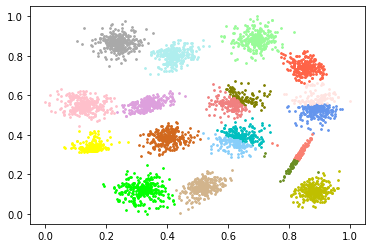

In [31]:
for K in range(16,21):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus K={}".format(K))
    plt.clf()

0.948 0.9823010869246002 9.046970594217079


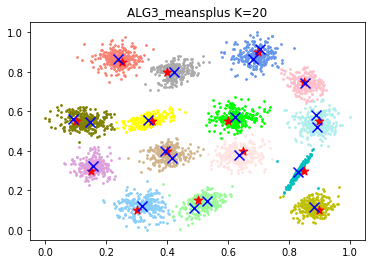

In [34]:
K=20
Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
plt.title("ALG3_meansplus K={}".format(K))
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus K={}".format(K))